In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Database connection details
driver_name = 'SQL SERVER'
server_name = 'DESKTOP-IJUSS6H'
database_name = 'Northwind'

# Connection string
connection_string = f"""
    Driver={{{driver_name}}};
    Server={{{server_name}}};
    Database={{{database_name}}};
    Trusted_Connection=yes;
"""

# Establish a connection
try:
    connection = pyodbc.connect(connection_string)
except pyodbc.Error as e:
    print(f"Error connecting to the database: {str(e)}")
    exit()

# Create a cursor
cursor = connection.cursor()

# SQL Query
query = "SELECT * FROM Northwind.dbo.TotalSalesTable;"

# Execute the query
try:
    cursor.execute(query)
except pyodbc.Error as e:
    print(f"Error executing the query: {str(e)}")
    connection.close()
    exit()

# Fetch the results into a DataFrame
try:
    results = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    df = pd.DataFrame.from_records(results, columns=column_names)
    print("Data read into DataFrame successfully.")
    print(df.head())  # Display the first few rows of the DataFrame
except pyodbc.Error as e:
    print(f"Error fetching results into DataFrame: {str(e)}")

# Close the connection
connection.close()

Data read into DataFrame successfully.
   OrderID CustomerID  Quantity UnitPrice  Discount  OrderDate  Country  \
0    10248      VINET         5   34.8000       0.0 1996-07-04   France   
1    10248      VINET        10    9.8000       0.0 1996-07-04   France   
2    10248      VINET        12   14.0000       0.0 1996-07-04   France   
3    10249      TOMSP         9   18.6000       0.0 1996-07-05  Germany   
4    10249      TOMSP        40   42.4000       0.0 1996-07-05  Germany   

                 CompanyName TotalSales  
0  Vins et alcools Chevalier   174.0000  
1  Vins et alcools Chevalier    98.0000  
2  Vins et alcools Chevalier   168.0000  
3        Toms SpezialitÃ¤ten   167.4000  
4        Toms SpezialitÃ¤ten  1696.0000  


In [3]:
df.shape

(2155, 9)

In [4]:
df

,OrderID,CustomerID,Quantity,UnitPrice,Discount,OrderDate,Country,CompanyName,TotalSales
0,10248,VINET,5,34.8000,0.00,1996-07-04,France,Vins et alcools Chevalier,174.0000
1,10248,VINET,10,9.8000,0.00,1996-07-04,France,Vins et alcools Chevalier,98.0000
2,10248,VINET,12,14.0000,0.00,1996-07-04,France,Vins et alcools Chevalier,168.0000
3,10249,TOMSP,9,18.6000,0.00,1996-07-05,Germany,Toms SpezialitÃ¤ten,167.4000
4,10249,TOMSP,40,42.4000,0.00,1996-07-05,Germany,Toms SpezialitÃ¤ten,1696.0000
...,...,...,...,...,...,...,...,...,...
2150,11077,RATTC,3,12.0000,0.02,1998-05-06,USA,Rattlesnake Canyon Grocery,35.2800
2151,11077,RATTC,4,6.0000,0.00,1998-05-06,USA,Rattlesnake Canyon Grocery,24.0000
2152,11077,RATTC,4,7.7500,0.00,1998-05-06,USA,Rattlesnake Canyon Grocery,31.0000
2153,11077,RATTC,4,10.0000,0.00,1998-05-06,USA,Rattlesnake Canyon Grocery,40.0000


In [5]:
df.dtypes

OrderID                 int64
CustomerID             object
Quantity                int64
UnitPrice              object
Discount              float64
OrderDate      datetime64[ns]
Country                object
CompanyName            object
TotalSales             object
dtype: object

In [6]:
df.isna().sum()

OrderID        0
CustomerID     0
Quantity       0
UnitPrice      0
Discount       0
OrderDate      0
Country        0
CompanyName    0
TotalSales     0
dtype: int64

In [7]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14528\242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
# Columns to split
columns_to_split = ['UnitPrice', 'Discount', 'TotalSales']

# Delimiter
delimiter = '.'

for column in columns_to_split:
    # Check if the column contains strings before using .str accessor
    if pd.api.types.is_string_dtype(df[column]):
        # Split the values by '.'
        split_columns = df[column].str.split('.', expand=True)

        # Create new column names for the split columns
        integer_column = f'{column}_Integer'
        decimal_column = f'{column}_Decimal'

        # Assign the split columns to the DataFrame
        df[integer_column] = split_columns[0]
        df[decimal_column] = split_columns[1]

# Columns to concatenate
columns_to_concatenate = [f'{column}_Integer' for column in columns_to_split] + [f'{column}_Decimal' for column in columns_to_split]

for column in columns_to_split:
    # Check if the column contains strings before using .str accessor
    if pd.api.types.is_string_dtype(df[column]):
        # Concatenate the split columns back into the original columns using '.'
        df[column] = df[f'{column}_Integer'].astype(str) + delimiter + df[f'{column}_Decimal'].astype(str)

# Display the modified DataFrame
print(df)







      OrderID CustomerID  Quantity UnitPrice  Discount  OrderDate  Country  \
0       10248      VINET         5   34.8000      0.00 1996-07-04   France   
1       10248      VINET        10    9.8000      0.00 1996-07-04   France   
2       10248      VINET        12   14.0000      0.00 1996-07-04   France   
3       10249      TOMSP         9   18.6000      0.00 1996-07-05  Germany   
4       10249      TOMSP        40   42.4000      0.00 1996-07-05  Germany   
...       ...        ...       ...       ...       ...        ...      ...   
2150    11077      RATTC         3   12.0000      0.02 1998-05-06      USA   
2151    11077      RATTC         4    6.0000      0.00 1998-05-06      USA   
2152    11077      RATTC         4    7.7500      0.00 1998-05-06      USA   
2153    11077      RATTC         4   10.0000      0.00 1998-05-06      USA   
2154    11077      RATTC        24   19.0000      0.20 1998-05-06      USA   

                     CompanyName TotalSales  
0      Vins et al

In [9]:
columns_to_convert = ['UnitPrice', 'Discount', 'TotalSales']



for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce').round(2)
        df[column] = df[column].astype('int64')

In [10]:
df.dtypes

OrderID                 int64
CustomerID             object
Quantity                int64
UnitPrice               int64
Discount                int64
OrderDate      datetime64[ns]
Country                object
CompanyName            object
TotalSales              int64
dtype: object

In [11]:
# Group by 'OrderDate' and calculate total sales for each date
total_sales = df.groupby('OrderDate')['TotalSales'].sum().reset_index()


In [12]:
# Assuming your DataFrame is named total_sales
total_sales['OrderDate'] = pd.to_datetime(total_sales['OrderDate'])
total_sales.set_index('OrderDate', inplace=True)

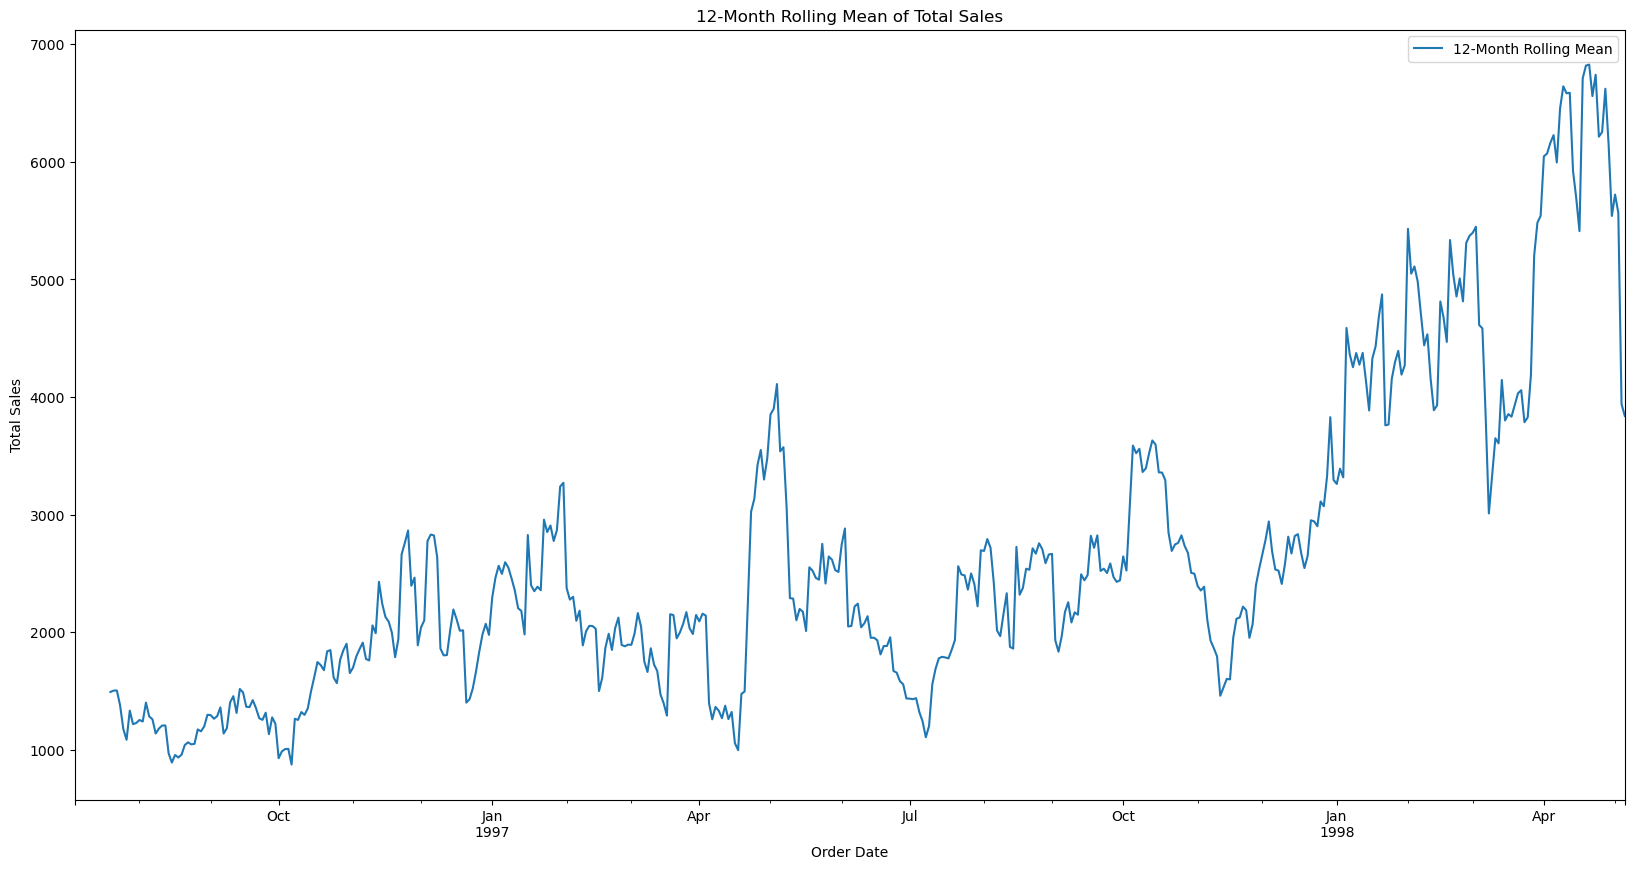

In [13]:
rolling_mean_series = total_sales['TotalSales'].rolling(12).mean()

# Plotting using pandas plot function
plt.figure(figsize=(20, 10))
rolling_mean_series.plot(label='12-Month Rolling Mean')
plt.title('12-Month Rolling Mean of Total Sales')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


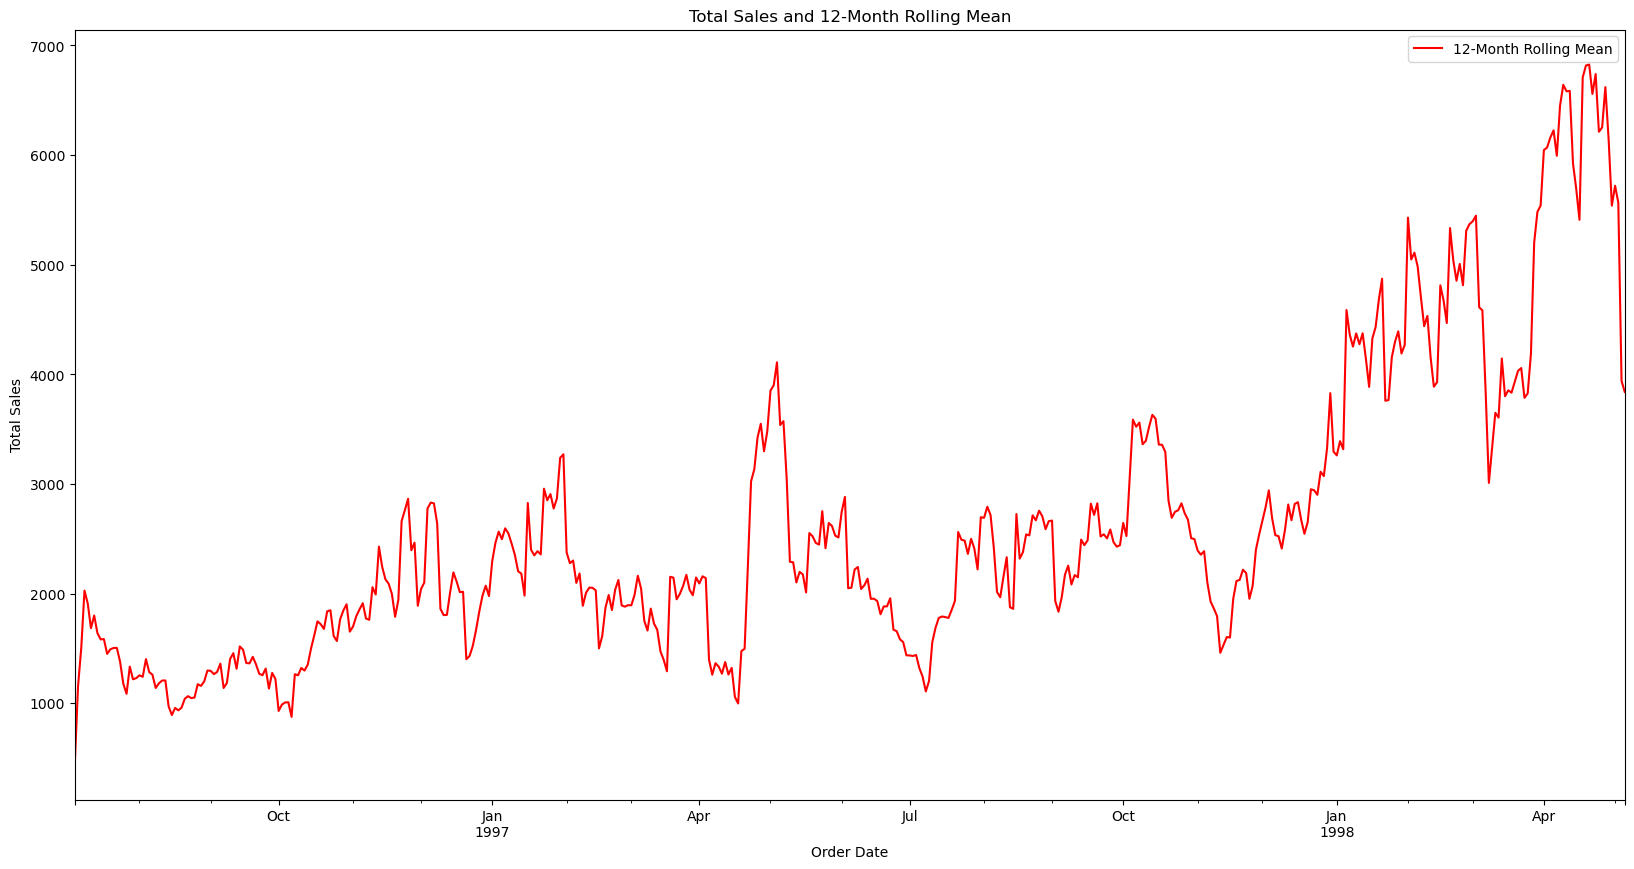

In [14]:
# Calculate the rolling mean
rolling_mean_series = total_sales['TotalSales'].rolling(window=12, min_periods=1).mean()

# Plotting using pandas plot function
plt.figure(figsize=(20, 10))
rolling_mean_series.plot(label='12-Month Rolling Mean', color='red')
plt.title('Total Sales and 12-Month Rolling Mean')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


In [15]:
# Resample to ensure regular frequency (monthly data)
total_sales_monthly = total_sales.resample('M').sum()


In [16]:
total_sales_monthly

,TotalSales
OrderDate,
1996-07-31,27847
1996-08-31,25469
1996-09-30,26370
1996-10-31,37496
1996-11-30,45582
1996-12-31,45221
1997-01-31,61241
1997-02-28,38460
1997-03-31,38530


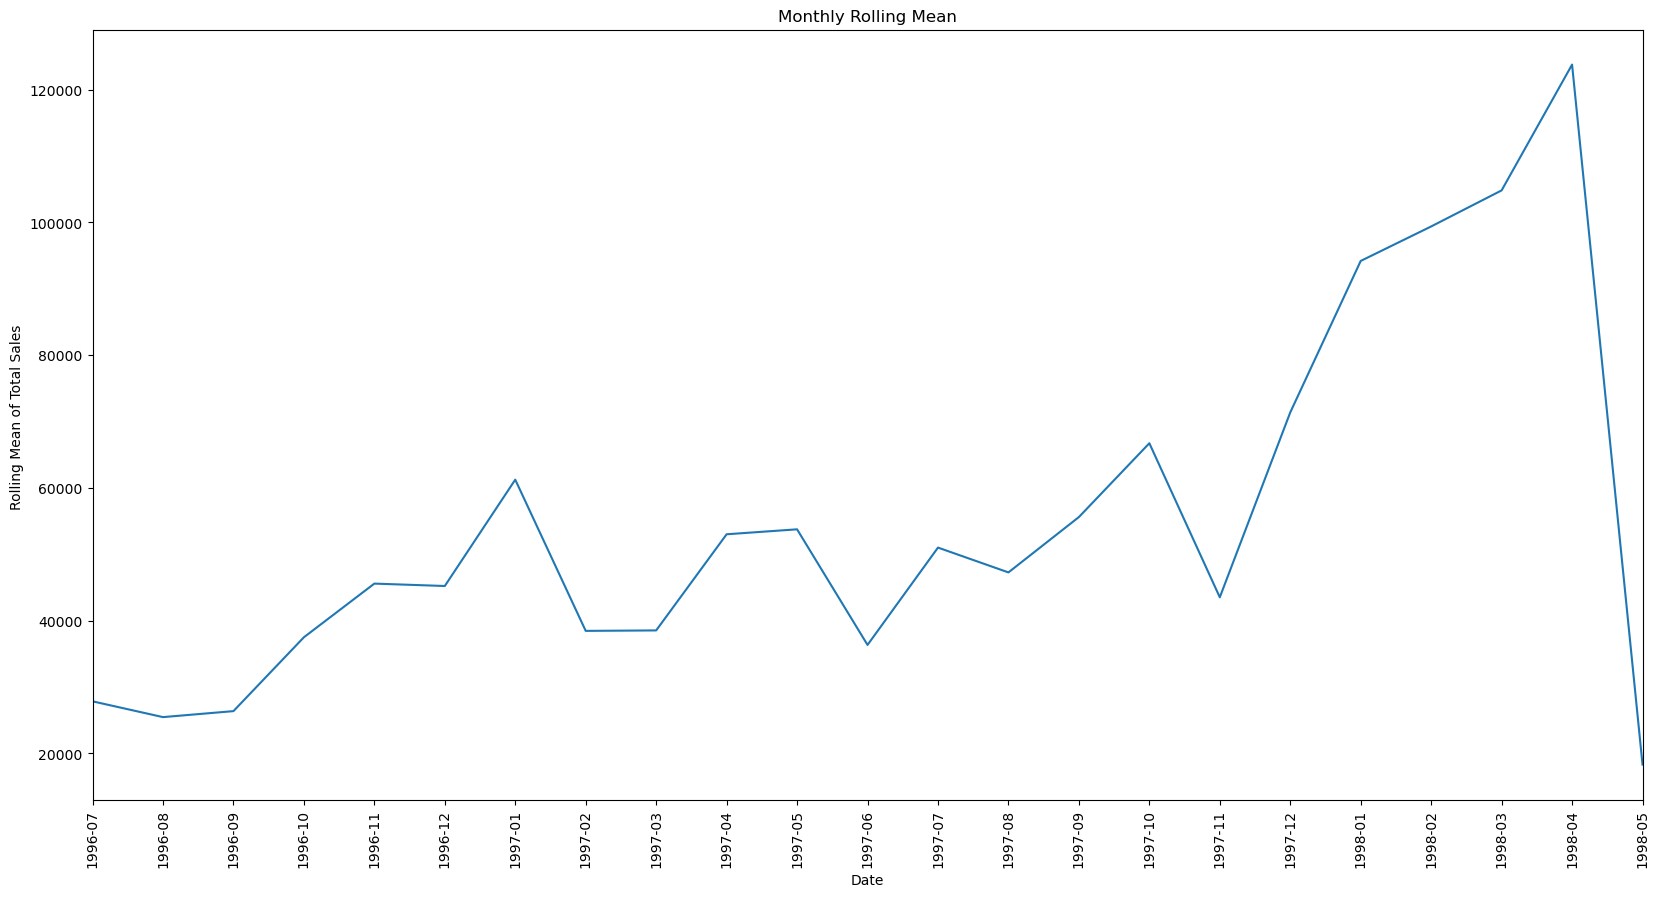

In [17]:
total_sales_monthly['TotalSales'].rolling(1).mean().plot(figsize = (20,10))

# Customize x-axis ticks
plt.xticks(total_sales_monthly.index, total_sales_monthly.index.strftime('%Y-%m'), rotation=90)

plt.xlabel('Date')
plt.ylabel('Rolling Mean of Total Sales ')
plt.title('Monthly Rolling Mean')

plt.show()



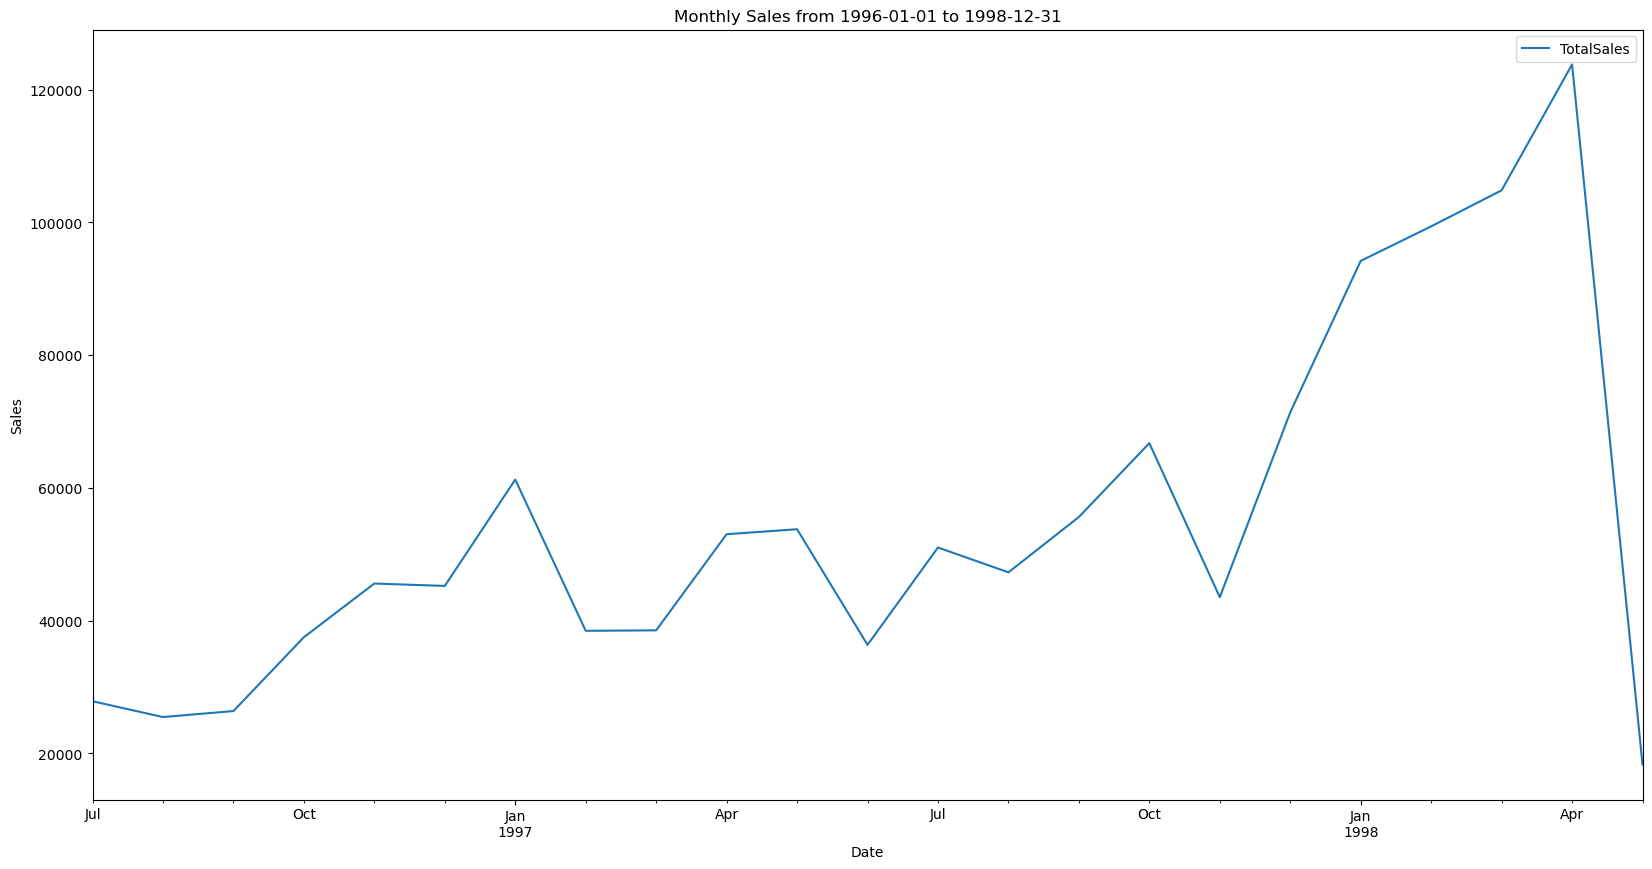

In [18]:
# Specify the start and end dates for plotting
start_date = '1996-01-01'
end_date = '1998-12-31'

# Filter the DataFrame based on the specified date range
filtered_data = total_sales_monthly[start_date:end_date]

# Plot the data
filtered_data.plot(figsize=(20, 10))
plt.title('Monthly Sales from {} to {}'.format(start_date, end_date))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


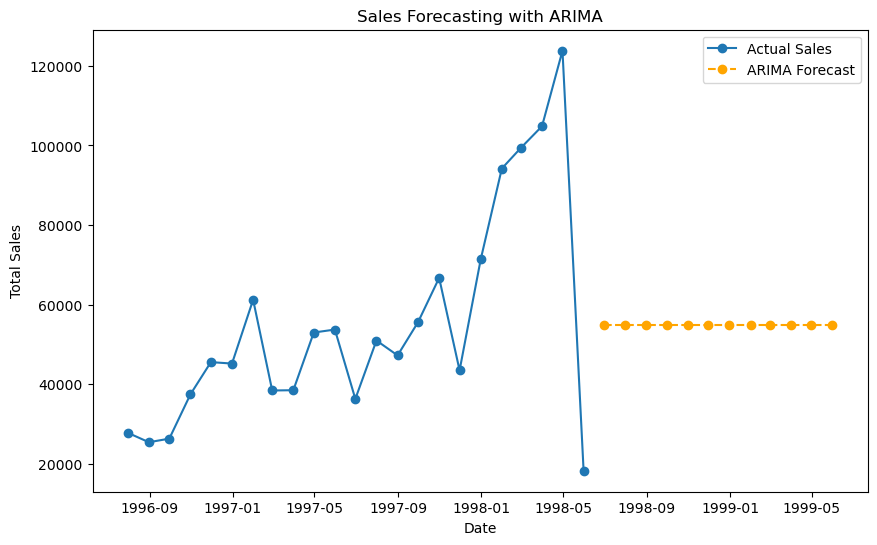

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'total_sales_monthly' is your DataFrame with 'TotalSales' and DateTime index
# Filter data up to '1998-05-31' for training
train_data = total_sales_monthly.loc[total_sales_monthly.index <= '1998-05-31', 'TotalSales']

# Create ARIMA model and fit to the training data
model = ARIMA(train_data, order=(0, 0, 0))  # Adjust order as needed
result = model.fit()

# Forecast sales for the period after '1998-05-31'
forecast_steps = 12  # Adjust the number of steps as needed
forecast = result.get_forecast(steps=forecast_steps)

# Extract forecasted values and index
forecast_index = pd.date_range(start='1998-06-01', periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean.values

# Plot the actual sales and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(total_sales_monthly.index, total_sales_monthly['TotalSales'], label='Actual Sales', marker='o')
plt.plot(forecast_index, forecast_values, label='ARIMA Forecast', linestyle='--', color='orange', marker='o')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


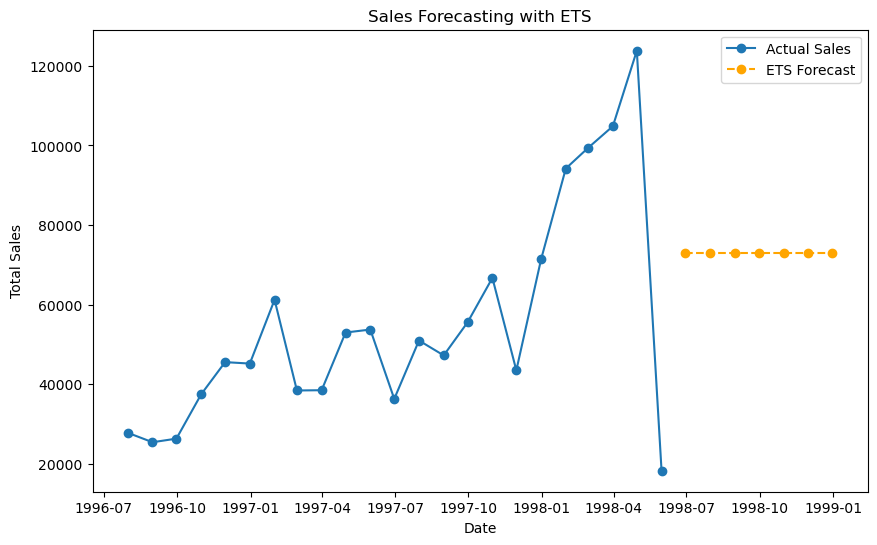

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'total_sales_monthly' is your DataFrame with 'TotalSales' and DateTime index
# Filter data up to '1998-05-31' for training
train_data = total_sales_monthly.loc[total_sales_monthly.index <= '1998-05-31', 'TotalSales']

# Create ETS model and fit to the training data
model = ExponentialSmoothing(train_data, trend=None, seasonal=None)
result = model.fit()

# Forecast sales for the period after '1998-05-31'
forecast_steps = 7  # Adjust the number of steps as needed
forecast_values = result.forecast(steps=forecast_steps)

# Extract forecasted index
forecast_index = pd.date_range(start='1998-06-01', periods=forecast_steps, freq='M')

# Plot the actual sales and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(total_sales_monthly.index, total_sales_monthly['TotalSales'], label='Actual Sales', marker='o')
plt.plot(forecast_index, forecast_values, label='ETS Forecast', linestyle='--', color='orange', marker='o')
plt.title('Sales Forecasting with ETS')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()



In [21]:
forecast_values

1998-06-30    73010.111591
1998-07-31    73010.111591
1998-08-31    73010.111591
1998-09-30    73010.111591
1998-10-31    73010.111591
1998-11-30    73010.111591
1998-12-31    73010.111591
Freq: M, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'total_sales_monthly' is your DataFrame with 'TotalSales' and DateTime index
# Feature engineering: create lag features
total_sales_monthly['TotalSales_Lag1'] = total_sales_monthly['TotalSales'].shift(1)
total_sales_monthly['TotalSales_Lag2'] = total_sales_monthly['TotalSales'].shift(2)

# Drop missing values resulting from lag features
total_sales_monthly.dropna(inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(total_sales_monthly, test_size=0.2, shuffle=False)

# Define features and target variable
features = ['TotalSales_Lag1', 'TotalSales_Lag2']
target = 'TotalSales'

# Train a linear regression model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Make predictions on the test set
test_predictions = model.predict(test_data[features])

# Evaluate the model
mse = mean_squared_error(test_data[target], test_predictions)
print(f'Mean Squared Error: {mse}')

# Forecast sales for the future period
future_steps = 7  # Adjust the number of steps as needed
last_observation = total_sales_monthly.iloc[-1][features].values.reshape(1, -1)
future_predictions = model.predict(last_observation)

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=total_sales_monthly.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')
forecast_values = np.repeat(future_predictions, future_steps)
forecast_df = pd.DataFrame({'TotalSales': forecast_values}, index=forecast_index)

# Plot the actual sales, the predicted values, and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(total_sales_monthly.index, total_sales_monthly['TotalSales'], label='Actual Sales', marker='o')
plt.plot(test_data.index, test_predictions, label='Predicted Sales', linestyle='--', color='orange', marker='o')
plt.plot(forecast_df.index, forecast_df['TotalSales'], label='Forecasted Sales', linestyle='--', color='green', marker='o')
plt.title('Sales Forecasting with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'total_sales_monthly' is your DataFrame with 'TotalSales' and DateTime index
# Set the window size for the Moving Average
window_size = 6

# Calculate the Simple Moving Average
total_sales_monthly['Moving_Avg'] = total_sales_monthly['TotalSales'].rolling(window=window_size).mean().shift(1)

# Split the data into training and testing sets
train_data, test_data = total_sales_monthly.iloc[:-7], total_sales_monthly.iloc[-7:]

# Plot the actual sales and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(total_sales_monthly.index, total_sales_monthly['TotalSales'], label='Actual Sales', marker='o')
plt.plot(test_data.index, test_data['Moving_Avg'], label=f'Moving Avg ({window_size}-month)', linestyle='--', color='orange', marker='o')

# Forecast sales for the future period
future_steps = 12  # Adjust the number of steps as needed
last_observation = total_sales_monthly.iloc[-window_size:]['TotalSales'].mean()
future_predictions = [last_observation] * future_steps

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=total_sales_monthly.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')
forecast_df = pd.DataFrame({'TotalSales': future_predictions}, index=forecast_index)

# Plot the forecasted values
plt.plot(forecast_df.index, forecast_df['TotalSales'], label='Forecasted Sales', linestyle='--', color='green', marker='o')

plt.title('Sales Forecasting with Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
